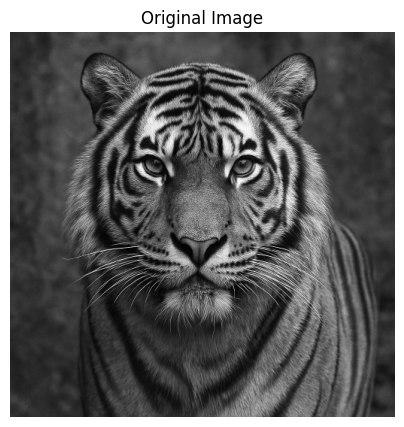

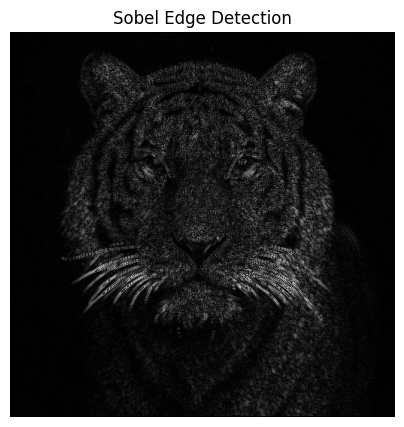

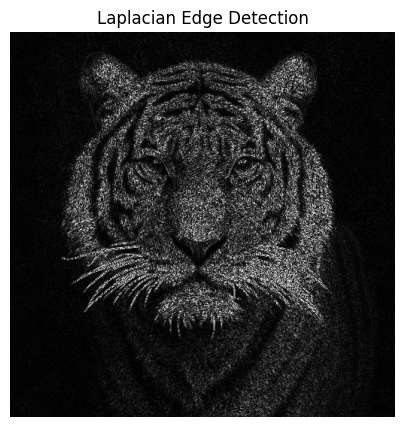

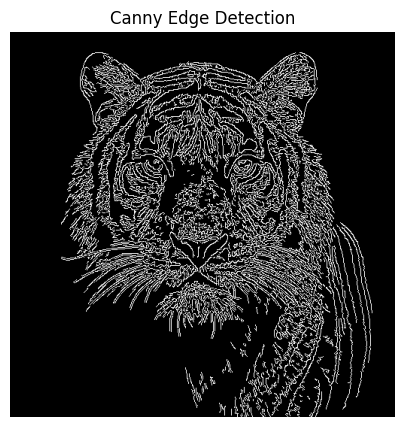

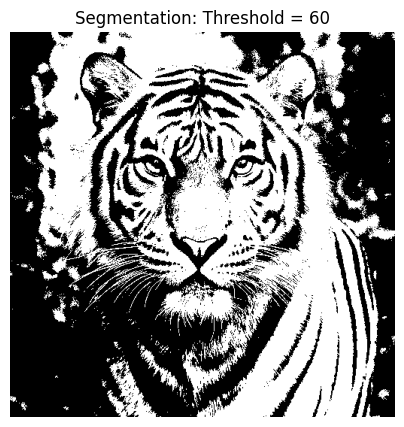

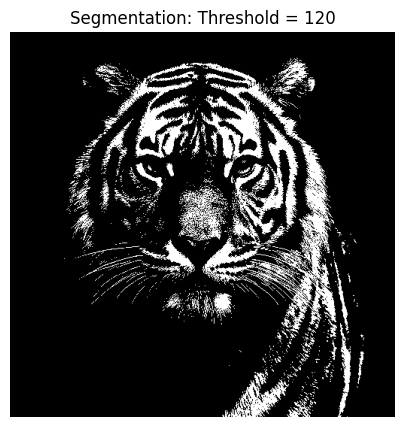

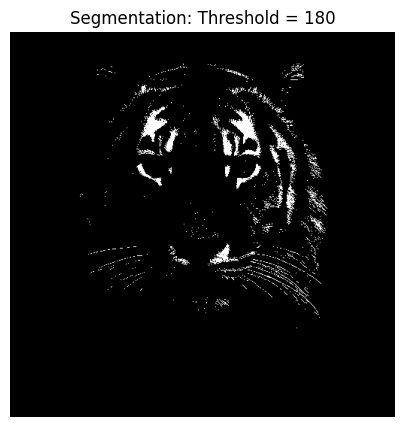

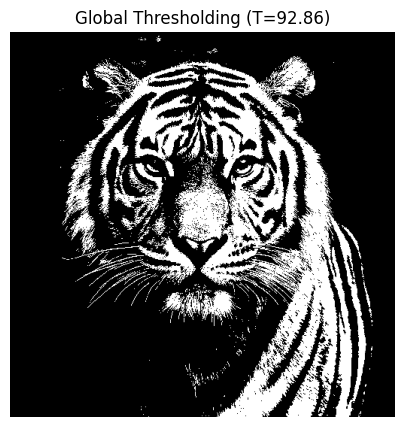

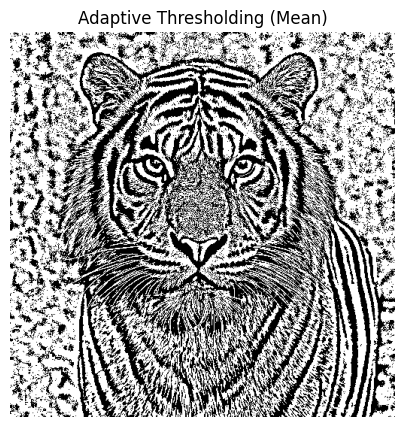

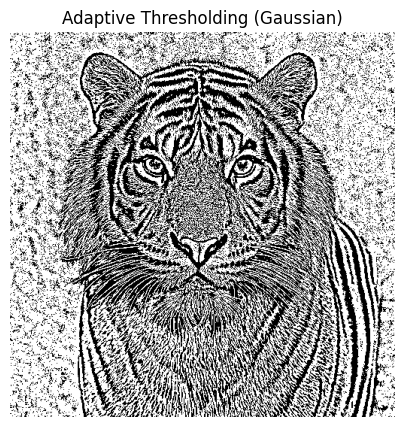

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(title, img, cmap='gray'):
    plt.figure(figsize=(5, 5))
    plt.title(title)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

# Load grayscale image
img = cv2.imread('images/tiger.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (512, 512))
show_image("Original Image", img)

# (a) Compare different edge detection algorithms (Spatial Domain)
edges_sobel = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=3)
edges_laplacian = cv2.Laplacian(img, cv2.CV_64F)
edges_canny = cv2.Canny(img, 100, 200)

show_image("Sobel Edge Detection", np.abs(edges_sobel).astype(np.uint8))
show_image("Laplacian Edge Detection", np.abs(edges_laplacian).astype(np.uint8))
show_image("Canny Edge Detection", edges_canny)

# (b) Segmentation based on gray level (simple threshold slices)
_, seg1 = cv2.threshold(img, 60, 255, cv2.THRESH_BINARY)
_, seg2 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
_, seg3 = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)

show_image("Segmentation: Threshold = 60", seg1)
show_image("Segmentation: Threshold = 120", seg2)
show_image("Segmentation: Threshold = 180", seg3)

# (c) Global Thresholding (Basic implementation)
def global_thresholding(image, tol=1e-3):
    T = np.mean(image)
    prev_T = 0

    while abs(T - prev_T) > tol:
        prev_T = T
        below_T = image[image < T]
        above_T = image[image >= T]

        mean1 = np.mean(below_T) if len(below_T) > 0 else 0
        mean2 = np.mean(above_T) if len(above_T) > 0 else 0
        T = (mean1 + mean2) / 2

    _, segmented = cv2.threshold(image, T, 255, cv2.THRESH_BINARY)
    return segmented, T

global_thresh_img, T = global_thresholding(img)
show_image(f"Global Thresholding (T={T:.2f})", global_thresh_img)

# (d) Adaptive Thresholding
adaptive_mean = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 11, 2)
adaptive_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 11, 2)

show_image("Adaptive Thresholding (Mean)", adaptive_mean)
show_image("Adaptive Thresholding (Gaussian)", adaptive_gauss)
